*Need computational text analysis? Save time! Call:*

# The Data-Sitters Club: Word Vector Exploration

This Jupyter notebook includes code for exploring word vectors created using the full text of all the *Baby-Sitters Club* books (including all mysteries, super specials, etc.), with the following exceptions:

* \#39 Poor Mallory!
* \#79 Mary Anne Breaks the Rules
* \#81 Kristy and Mr. Mom
* \#83 Stacey vs. the BSC
* \#84 Dawn and the School Spirit War 
* \#87 Stacey and the Bad Girls
* \#SS11 The Baby-sitters Remember

For some background on what word vectors are and how they work, check out [Ryan Heuser's blog posts](http://ryanheuser.org/word-vectors) on the topic.

These word vectors were created using the gensim package for word2vec, with a dimensonality of 200, downsampling set to 1e-3. The text was minimally (and un-carefully) pre-processed to remove commas, periods, and quotation marks. Once we have a full corpus, we'll publish a whole word vector creation notebook with all the pre-processing steps; this is just to play with in the meantime.

## Loading the word vectors
Make sure that you have the `bscdemo.model` file in the same directory as this Jupyter notebook before running the code cell below to load the word vectors. You'll need to unzip *bscdemo.model.zip*, and move the resulting bscdemo.model into the same directory as the notebook.

When you run the code cell below, you should see a set of messages appear below the cell, but if it works correctly, the last one should say `loaded bscdemo.model`.

In [52]:
import gensim
from gensim.models import KeyedVectors
fname="bscdemo.model"
model = gensim.models.Word2Vec.load(fname)

2019-10-02 16:37:33,660 : INFO : loading Word2Vec object from bscdemo.model
2019-10-02 16:37:33,662 : WARNING : this function is deprecated, use smart_open.open instead
2019-10-02 16:37:34,288 : INFO : loading wv recursively from bscdemo.model.wv.* with mmap=None
2019-10-02 16:37:34,289 : INFO : setting ignored attribute vectors_norm to None
2019-10-02 16:37:34,290 : INFO : loading vocabulary recursively from bscdemo.model.vocabulary.* with mmap=None
2019-10-02 16:37:34,291 : INFO : loading trainables recursively from bscdemo.model.trainables.* with mmap=None
2019-10-02 16:37:34,292 : INFO : setting ignored attribute cum_table to None
2019-10-02 16:37:34,293 : INFO : loaded bscdemo.model


## Most similar terms

Put any word in the corpus between the quotes below to show the most similar words. You can change the value of *topn* to show more, or fewer, words.

Keep in mind that the text is all lower-case due to the pre-processing mentioned above. If you use any capital letters, you will get an error about the word being out of the vocabulary.

Before generating the word vectors, we created bigrams and trigrams, which are indicated using an underscore (e.g. *mary_anne*). You can use bigrams as the source input "word" as well.

In [54]:
w1 = "mary_anne"
model.wv.most_similar (positive=w1,topn=30)

2019-10-02 16:44:36,441 : INFO : precomputing L2-norms of word weight vectors


[('stacey', 0.8087077140808105),
 ('claud', 0.783153772354126),
 ('abby', 0.7753046751022339),
 ('shannon', 0.7407026290893555),
 ('claudia', 0.7396952509880066),
 ('jessi', 0.7226901650428772),
 ('dawn', 0.7130868434906006),
 ('mallory', 0.6676522493362427),
 ('anna', 0.6610537767410278),
 ('mal', 0.6541677713394165),
 ('laine', 0.6357235312461853),
 ('kristy', 0.6286424994468689),
 ('charlotte', 0.6166675090789795),
 ('mai', 0.6085880398750305),
 ('sunny', 0.5989078283309937),
 ('logan', 0.597368061542511),
 ('her_mother', 0.5752037763595581),
 ('danielle', 0.5609983205795288),
 ('janine', 0.5580407381057739),
 ('cokie', 0.546456515789032),
 ('victoria', 0.5386191606521606),
 ('ashley', 0.536468505859375),
 ('tiffany', 0.5340152978897095),
 ('mimi', 0.5286753177642822),
 ('erica', 0.5284410715103149),
 ('maria', 0.5282090306282043),
 ('sharon', 0.5185384154319763),
 ('corrie', 0.5179238319396973),
 ('kil-bourne', 0.5078524947166443),
 ('stephie', 0.5047507882118225)]

In [55]:
w1 = "mary_anne's_boyfriend"
model.wv.most_similar (positive=w1,topn=30)

[('our_treasurer', 0.9171445369720459),
 ('very_organized', 0.9148004055023193),
 ('kristy’s_best_friend', 0.9095317125320435),
 ('logan_bruno.', 0.907341718673706),
 ('outspoken', 0.9024476408958435),
 ('our_alternate_officer', 0.9010244607925415),
 ('boyfriend)', 0.8996708393096924),
 ("mary_anne's_boyfriend._he's", 0.8953051567077637),
 ('our_vice-president', 0.8948587775230408),
 ('easygoing', 0.8947371244430542),
 ('an_honorary', 0.8943606615066528),
 ('math_whiz.', 0.893000066280365),
 ('pretty_amazing', 0.8909308910369873),
 ('(short_for', 0.8876466155052185),
 ('mary_anne’s_boyfriend', 0.8872705698013306),
 ('very_shy', 0.8866142630577087),
 ('wealthy', 0.8837201595306396),
 ('super-organized', 0.8833213448524475),
 ('other_associate_member', 0.8830680847167969),
 ('other_associate', 0.8825700879096985),
 ('an_eighth-grader', 0.8818248510360718),
 ('stubborn.)', 0.8817631006240845),
 ('bsc_treasurer', 0.8802707195281982),
 ('claudia’s_best_friend', 0.8796262145042419),
 ("krist

## Most dissimilar terms
Put any word in the corpus between the quotes below to show the most **dissimilar** words (i.e. those words that are used in the most dissimilar ways to the one you've given the model). You can change the value of *topn* to show more, or fewer, words.

This isn't exactly that useful, other than to get a sense of how word vectors look at similarity (e.g. similarity in how a word is used semantically). Note that the *least-similar* words are at the bottom of the list.

In [56]:
w1 = "kristy"
model.wv.most_similar (negative=w1,topn=30)

[('dissect', 0.3708440363407135),
 ('frederickson.', 0.31775641441345215),
 ('murdered.', 0.29090845584869385),
 ('idto', 0.27426737546920776),
 ('borrow.', 0.26972487568855286),
 ('headstrong', 0.2429170310497284),
 ('whaaat', 0.23247098922729492),
 ('scrimmage.', 0.2289089858531952),
 ('seen_before.', 0.22631953656673431),
 ('office)', 0.22106100618839264),
 ('photographing', 0.21874073147773743),
 ('-r', 0.1819244623184204),
 ('togav', 0.17867591977119446),
 ('ihllalfplftlfellrl', 0.17493721842765808),
 ('ten-fifteen.', 0.16839605569839478),
 ('song.)', 0.16290390491485596),
 ('difficult_decision', 0.15977539122104645),
 ('questionnaires', 0.15666872262954712),
 ('waaaaahhhhh', 0.15461422502994537),
 ('ednesday', 0.14903801679611206),
 ('flights.', 0.14564459025859833),
 ('seatmate', 0.14185652136802673),
 ('zzz', 0.1409178376197815),
 ("'w", 0.14078307151794434),
 ('bustled_around', 0.13906532526016235),
 ('126', 0.1358305960893631),
 ('79', 0.1333293467760086),
 ('yaay', 0.1322548

## Analogies
Without a larger corpus, the results of these analogies is very dissatisfying. The code below shows how to construct these analogies if you want to try them.

The analogy code takes three words as input. To render the analogy Mallory:white::Jessi:??? (one might imagine "black" as a high probability answer), you would use the code below. Or, more abstractly, given *A:B::C:??*, the code would be: `positive=['A','C'],negative=['B']`

In [57]:
# Mallory is to white what Jessi is to...
model.wv.most_similar(positive=['mallory','jessi'],negative=['white'],topn=30)

[('mal', 0.8045724630355835),
 ('mai', 0.7904223799705505),
 ('claud', 0.7586207985877991),
 ('abby', 0.7536253929138184),
 ('stacey', 0.7345302104949951),
 ('kristy', 0.6963893175125122),
 ('claudia', 0.6906196475028992),
 ('shannon', 0.6899857521057129),
 ('charlotte', 0.6896331906318665),
 ('dawn', 0.6671716570854187),
 ('mary_anne', 0.6397250890731812),
 ('becca', 0.6200226545333862),
 ('jessi.', 0.6111703515052795),
 ('laine', 0.609732449054718),
 ('anna', 0.5751701593399048),
 ('mrs._pike', 0.5689882636070251),
 ('danielle', 0.5687900185585022),
 ('logan', 0.5599814653396606),
 ('everybody', 0.5526412725448608),
 ('dawn.', 0.5479577779769897),
 ('rest_of_us', 0.5391781330108643),
 ('mary_anne.', 0.5375857353210449),
 ('dr._johanssen', 0.5317626595497131),
 ('mrs._barrett', 0.5301694273948669),
 ('erica', 0.521365761756897),
 ('mrs._prezzioso', 0.519612193107605),
 ('others', 0.5174843072891235),
 ('everyone', 0.5153011679649353),
 ('corrie', 0.5135576725006104),
 ('ashley', 0.511

## Visualization
The code below will generate two kinds of visualizations for the word vectors, by reducing the dimensionality of the vectors from 200 dimensions (or however many you specified when creating the vectors) down to 2.

For this to work, you need the most recent version of *matplotlib*; as of March 2019, you may need to open a terminal and run `conda uninstall matplotlib` then `conda install matplotlib` to update to the latest version, depending on when you installed Anaconda.

You also need to install the *sklearn* module. In the terminal: `pip install sklearn`.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Visualizing similar words
The code below will plot a given word, and the most similar words to it. You can increase or decrease the number of values displayed by changing the *topn* value for *close_words* (currently 30).

You can input the word you want to use as the basis for similar words in the second code block below. Run the two code blocks below (after changing the second code block to include the word you want to visualize) to get the chart.

In [58]:
## visualizing subset of vectors
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar (word, topn=30)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    
    
    
    
    plt.scatter(x_coords, y_coords)
    


    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

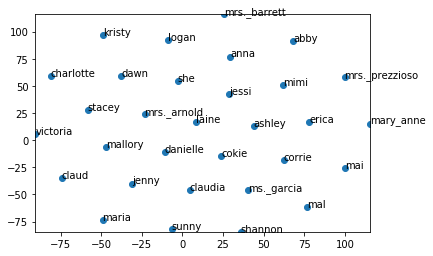

In [59]:
#put your word between the single quotes here
display_closestwords_tsnescatterplot(model,'kristy')

## Acknowledgements

Thanks to Aneesha Bakharia for [this Medium post on *Using TSNE to Plot a Subset of Similar Words from Word2Vec*](https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229), where I found the code that the visualization section is based on.